What can be a simplest deep learning example?

In [1]:
# only on google colab
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


We will implement simplest deep learning with simple example of a line.

A line is represented as 


$ y = ax + b $

$ y = a_1x + a_2 x$

$ y = a_1x_1 + a_2 x_2$

$ y_i = a_1x_{1i} + a_2 x_{2i}$



=> to represent a point on a line  
$y$ is a dot product to matrix $x$ & $a$ i.deep learninge

$\bar y $ =X $\bar a $ 

 
#Create the line

In [0]:
%matplotlib inline
from fastai.basics import *

In [3]:
n = 100
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.5704,  1.0000],
        [-0.4755,  1.0000],
        [ 0.5086,  1.0000],
        [-0.3661,  1.0000],
        [ 0.4988,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

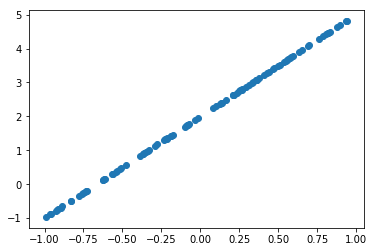

In [5]:
y = x@a #+ torch.rand(n)
plt.scatter(x[:,0], y);

In NN we have only `x & y`. `a` is not available to us and we have to predict `a`. 

To start calculation we randomly initialize `a`

In [6]:
def mse(y_hat, y): 
    return ((y_hat-y)**2).mean()


a = nn.Parameter(torch.rand(2)); a


Parameter containing:
tensor([0.5055, 0.0874], requires_grad=True)

In [0]:
def update():
    y_hat = x @ a
    loss = mse(y_hat, y)
    if t%10==0:
        print(loss)
    loss.backward()
    # torch.no_grad() set requires_grad flag to false
    # requires_grad means this layer is available for training
    # We are not using any layers.
    with torch.no_grad():
        # the gradient is showing where the next value of a should reside.
        # we subtract it from previous value.
        a.sub_(lr * a.grad) 
        a.grad.zero_()

In [8]:
lr = 1e-1
for t in range(100):
    update()

tensor(5.4649, grad_fn=<MeanBackward0>)
tensor(0.5915, grad_fn=<MeanBackward0>)
tensor(0.1551, grad_fn=<MeanBackward0>)
tensor(0.0434, grad_fn=<MeanBackward0>)
tensor(0.0122, grad_fn=<MeanBackward0>)
tensor(0.0034, grad_fn=<MeanBackward0>)
tensor(0.0010, grad_fn=<MeanBackward0>)
tensor(0.0003, grad_fn=<MeanBackward0>)
tensor(7.5263e-05, grad_fn=<MeanBackward0>)
tensor(2.1110e-05, grad_fn=<MeanBackward0>)


In [9]:
a

Parameter containing:
tensor([2.9956, 1.9999], requires_grad=True)

We can the value of predicted `a` is close to original `[3,2]`

Text(0.5, 1.0, 'Calculated')

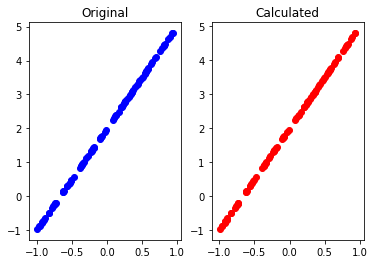

In [10]:
plt.subplot(1, 2, 1)
plt.scatter(x[:,0],y, c='b')
plt.title("Original")
plt.subplot(1, 2, 2)
plt.scatter(x[:,0],x@a, c='r');
plt.title("Calculated")

Thanks https://fast.ai for this example.